Submission kelas machine learning pemula

Ruly Anggriawan

https://www.dicoding.com/users/ruly-anggriawan

Beasiswa Indonesia New Collar & Skill Accelerator Center (IBM)


In [60]:
# check tensorflow version
import tensorflow as tf
tf.__version__

'2.3.0'

In [61]:
# download data
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-03 01:32:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  22.0MB/s    in 15s     

2020-11-03 01:32:31 (20.2 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [62]:
# decompress data
import zipfile,os
data_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(data_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [63]:
# check data
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'paper', 'README_rpc-cv-images.txt', 'scissors']

In [64]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

rock_img_files = os.listdir(rock_dir)
paper_img_files = os.listdir(paper_dir)
scissor_img_files = os.listdir(scissors_dir)

print('total data rock : ',len(rock_img_files))
print('total data paper : ',len(paper_img_files))
print('total data scissor : ',len(scissor_img_files))

total data rock :  726
total data paper :  712
total data scissor :  750


Showing some rock pictures



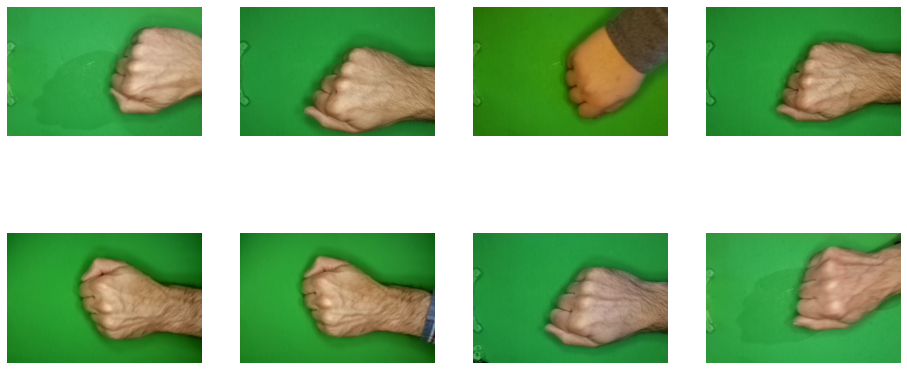


Showing some paper pictures



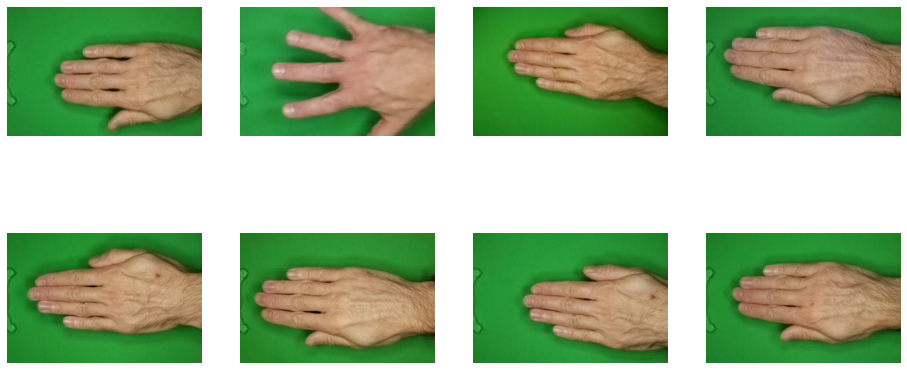


Showing some scissor pictures



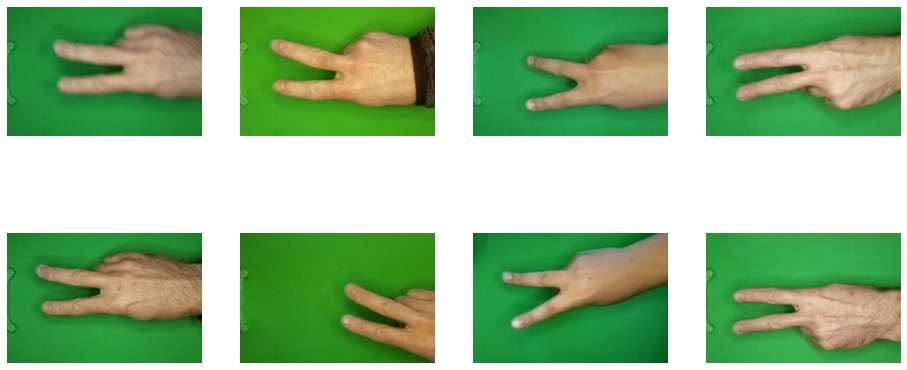

In [65]:
# check sample image for decide image augmentation, image resolution 300 width x 200 high pixel, .png format 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_rock_pix = [os.path.join(rock_dir, fname) 
                for fname in rock_img_files[pic_index-8:pic_index]]
next_paper_pix = [os.path.join(paper_dir, fname) 
                for fname in paper_img_files[pic_index-8:pic_index]]
next_scissor_pix = [os.path.join(scissors_dir, fname) 
                for fname in scissor_img_files[pic_index-8:pic_index]]

print ("Showing some rock pictures")
print()
for i, img_path in enumerate(next_rock_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print()
print ("Showing some paper pictures")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_paper_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

print()
print ("Showing some scissor pictures")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_scissor_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()


In [66]:
# image data generator
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_height = 150
img_width = 150
 
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    vertical_flip=True,
                    zoom_range=0.2,
                    shear_range = 0.2,
                    validation_split = 0.4,
                    fill_mode = 'nearest')
 
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    base_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') 


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [67]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (img_width,img_height,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 256)      

In [70]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [72]:
# callback for timer
import time

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [73]:
time_callback = TimeHistory()

history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
    callbacks=[time_callback]
)

Epoch 1/20
25/25 - 41s - loss: 0.3688 - accuracy: 0.8662 - val_loss: 0.2760 - val_accuracy: 0.8813
Epoch 2/20
25/25 - 41s - loss: 0.2611 - accuracy: 0.9052 - val_loss: 0.1722 - val_accuracy: 0.9375
Epoch 3/20
25/25 - 45s - loss: 0.2333 - accuracy: 0.9212 - val_loss: 0.2078 - val_accuracy: 0.9187
Epoch 4/20
25/25 - 41s - loss: 0.1849 - accuracy: 0.9351 - val_loss: 0.1510 - val_accuracy: 0.9500
Epoch 5/20
25/25 - 41s - loss: 0.1574 - accuracy: 0.9377 - val_loss: 0.1298 - val_accuracy: 0.9688
Epoch 6/20
25/25 - 41s - loss: 0.1394 - accuracy: 0.9610 - val_loss: 0.2539 - val_accuracy: 0.8938
Epoch 7/20
25/25 - 41s - loss: 0.2059 - accuracy: 0.9234 - val_loss: 0.1322 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 41s - loss: 0.2092 - accuracy: 0.9234 - val_loss: 0.2404 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 42s - loss: 0.2021 - accuracy: 0.9250 - val_loss: 0.1860 - val_accuracy: 0.9187
Epoch 10/20
25/25 - 41s - loss: 0.1018 - accuracy: 0.9662 - val_loss: 0.0957 - val_accuracy: 0.9688
Epoch 11/

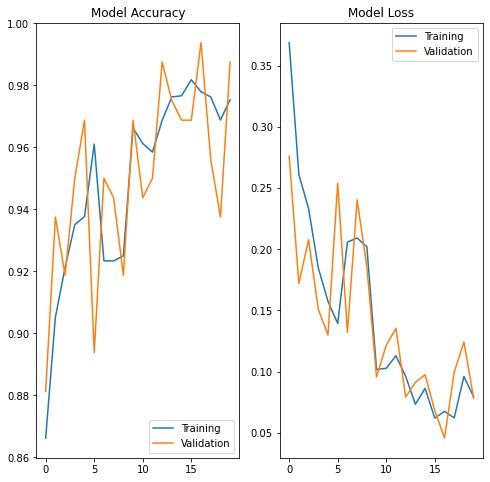

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training')
plt.plot(epochs_range, val_acc, label='Validation')
plt.legend(loc='lower right')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training')
plt.plot(epochs_range, val_loss, label='Validation')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()

In [80]:
# check training duration
total_training_time = sum(time_callback.times)/60
print('total training time : {} minutes'.format(total_training_time))

total training time : 14.474772409598033 minutes


In [89]:
# test data
import numpy as np
from google.colab import files

Saving hNKauGm372Z48JWy.png to hNKauGm372Z48JWy.png
hNKauGm372Z48JWy.png
rock


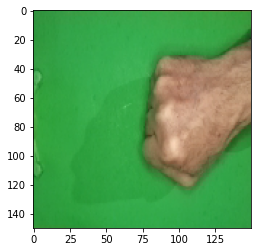

In [90]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(img_width,img_height))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving ywXiLajxMzhy7BST.png to ywXiLajxMzhy7BST.png
ywXiLajxMzhy7BST.png
paper


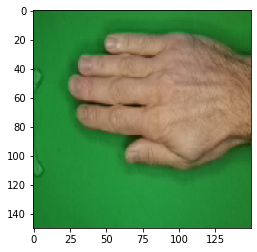

In [82]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(img_width,img_height))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving dLkgXxZJ7KFoD4Ky.png to dLkgXxZJ7KFoD4Ky.png
dLkgXxZJ7KFoD4Ky.png
scissors


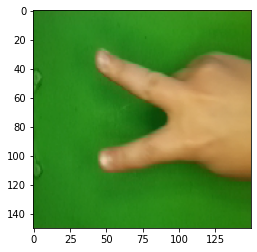

In [83]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(img_width,img_height))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

Saving paper1.jpeg to paper1.jpeg
paper1.jpeg
paper


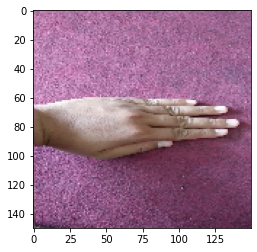

In [87]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(img_width,img_height))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')